<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/Statistical_Modelling_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistical Modelling

This workshop will be more open ended from previous workshops as you will be using different models to classify sets of data. For each of the datasets below, use Logistic Regression, Decision Trees as well as any clustering algorithm to solve the given classification problem. For each of the models, report the accuracy score and create ROC curves to show how well your model did. For each dataset, report which model did the best job with classification given these validation metrics. Try to optimize your model by using an appropriate train/test split, sampling technique (seen in Module 5) and any other preprocessing technique. 

##Income Classification

https://www.kaggle.com/lodetomasi1995/income-classification

This data set contains details of the backgrounds of several individuals and using this information, classify what income braket these individuals belong to.

##Churn Modelling

https://www.kaggle.com/shrutimechlearn/churn-modelling

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

##Mobile Price Classification

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

**NOTE:** You will have to do some research on mobile phone prices and their specs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import io
from sklearn.metrics import roc_curve

In [2]:
#INCOME CLASSIFICATION:
from google.colab import files
data = files.upload()

Saving income.csv to income.csv


In [3]:
df = pd.read_csv(io.BytesIO(data['income.csv']))

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df1 = df[['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']].copy()

In [6]:
df[" workclass"] = df[" workclass"].astype('category')
df1["workclass_cat"] = df[" workclass"].cat.codes

df[" income"] = df[" income"].astype('category')
df1["income_cat"] = df[" income"].cat.codes

df[" marital-status"] = df[" marital-status"].astype('category')
df1["marital-status_cat"] = df[" marital-status"].cat.codes

df[" occupation"] = df[" occupation"].astype('category')
df1["occupation_cat"] = df[" occupation"].cat.codes

df[" relationship"] = df[" relationship"].astype('category')
df1["relationship_cat"] = df[" relationship"].cat.codes

df[" race"] = df[" race"].astype('category')
df1["race_cat"] = df[" race"].cat.codes

df[" sex"] = df[" sex"].astype('category')
df1["sex_cat"] = df[" sex"].cat.codes

df[" native-country"] = df[" native-country"].astype('category')
df1["native-country_cat"] = df[" native-country"].cat.codes

df[" education"] = df[" education"].astype('category')
df1["education_cat"] = df[" education"].cat.codes

In [7]:
df1.dtypes

age                   int64
 fnlwgt               int64
 education-num        int64
 capital-gain         int64
 capital-loss         int64
 hours-per-week       int64
workclass_cat          int8
income_cat             int8
marital-status_cat     int8
occupation_cat         int8
relationship_cat       int8
race_cat               int8
sex_cat                int8
native-country_cat     int8
education_cat          int8
dtype: object

In [8]:
X= df1
y=df1['income_cat']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
yhat = lr.predict(X_train)

dftrain = pd.DataFrame(X_train, columns = ['age', 'workclass_cat',	' fnlwgt',	'education_cat',	' education-num',	'marital-status_cat',	'occupation_cat',	'relationship_cat',	'race_cat',	'sex_cat',	' capital-gain',	' capital-loss',	' hours-per-week',	'native-country_cat'])
dftrain['Actual'] = y_train
dftrain['Predicted'] = yhat
dftrain.head()

,age,workclass_cat,fnlwgt,education_cat,education-num,marital-status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital-gain,capital-loss,hours-per-week,native-country_cat,Actual,Predicted
32098,45,4,170871,11,9,2,3,0,4,1,7298,0,60,39,1,1
25206,47,7,108890,11,9,0,1,4,4,0,1831,0,38,39,0,0
23491,48,4,187505,15,10,2,12,0,4,1,0,0,50,39,1,0
12367,29,4,145592,11,9,4,3,1,4,1,0,0,40,13,0,0
7054,23,4,203003,5,4,4,3,1,4,1,0,0,25,11,0,0


In [10]:
lr.coef_

array([[-5.96474969e-03, -2.36897512e-06, -1.36340985e-03,
         3.43683806e-04,  7.95475260e-04, -6.43341407e-03,
        -1.02451987e-03,  7.97501943e-04, -1.35544939e-03,
        -1.24900369e-03, -1.22364386e-03, -9.46580698e-04,
         2.07891877e-05, -1.05875635e-02, -2.44103101e-03]])

Softmax

In [11]:
lr.predict_proba(X_test)[5]

array([0.83447375, 0.16552625])

In [12]:
np.sum(lr.predict_proba(X_test)[0])

1.0

Accuracy

In [13]:
accuracy_score(y_train, yhat)

0.7998859248859249

In [14]:
yhat = lr.predict(X_test)
accuracy_score(y_test, yhat)

0.8007984440577336

Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier(random_state=0)

In [17]:
model = clf.fit(X_train, y_train)

In [18]:
yhat = model.predict(X_train)

In [19]:
yhat = model.predict(X_test)

In [20]:
model.score(X_train, y_train)

1.0

In [49]:
model.score(X_test, y_test)

1.0

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

In [23]:
accuracy_score(y_train, y_kmeans)

0.38368725868725867

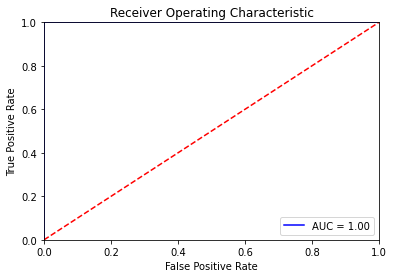

In [24]:
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
#CHURN MODELLING:
from google.colab import files
data = files.upload()

Saving Churn.csv to Churn.csv


In [26]:
churn = pd.read_csv(io.BytesIO(data['Churn.csv']))

In [27]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [29]:
churn1 = churn[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].copy()

In [30]:
churn["Geography"] = churn["Geography"].astype('category')
churn1["Geography_cat"] = churn["Geography"].cat.codes

churn["Gender"] = churn["Gender"].astype('category')
churn1["Gender_cat"] = churn["Gender"].cat.codes

In [31]:
X2= churn1
y2=churn['Exited']

In [32]:
churn1.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Geography_cat         int8
Gender_cat            int8
dtype: object

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)
lr2 = LogisticRegression().fit(X_train2, y_train2)
yhat2 = lr2.predict(X_train2)

dftrain2 = pd.DataFrame(X_train2, columns = ['CreditScore', 'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Geography_cat',	'Gender_cat'])
dftrain2['Actual'] = y_train2
dftrain2['Predicted'] = yhat2
dftrain2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_cat,Gender_cat,Actual,Predicted
7681,641,33,2,146193.60,2,1,1,55796.83,0,1,1,0
9031,541,39,7,0.00,2,1,0,19823.02,0,1,0,0
3691,590,76,5,160979.68,1,0,1,13848.58,0,0,0,1
202,516,50,5,0.00,1,0,1,146145.93,2,1,1,0
5625,508,60,7,143262.04,1,1,1,129562.74,0,0,0,1


In [35]:
lr2.coef_

array([[-5.12050630e-03,  4.42845465e-02, -2.28359957e-03,
         3.84956925e-06, -5.42996751e-04, -1.81725221e-04,
        -1.29281520e-03, -1.20320109e-06,  3.87238347e-04,
        -1.03716314e-03]])

SoftMax

In [36]:
lr2.predict_proba(X_test2)[0]

array([0.77806346, 0.22193654])

In [40]:
np.sum(lr2.predict_proba(X_test2)[0])

1.0

Accuracy

In [41]:
accuracy_score(y_train2, yhat2)

0.7928571428571428

In [42]:
yhat2 = lr2.predict(X_test2)
accuracy_score(y_test2, yhat2)

0.784

Decision Tree

In [43]:
clf2 = DecisionTreeClassifier(random_state=0)

In [44]:
model2 = clf2.fit(X_train2, y_train2)

In [45]:
yhat2 = model2.predict(X_train2)

In [46]:
yhat2 = model2.predict(X_test2)

In [47]:
model2.score(X_train2, y_train2)

1.0

In [48]:
model2.score(X_test2, y_test2)

0.795

In [50]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X_train2)
y_kmeans2 = kmeans2.predict(X_train2)

In [51]:
accuracy_score(y_train2, y_kmeans2)

0.48314285714285715

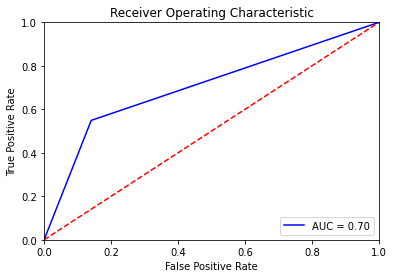

In [52]:
fpr, tpr, threshold = metrics.roc_curve(y_test2, yhat2)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()